# Exercício Semana 10 - SIN5014
Renato Banzai n. USP 3683321


1 - Faça um programa que identifique as bordas em uma imagem e faça “emendas” usando morfologia matemática. Além do programa, você deve entregar dois exemplos de processamento de imagens reais, mostrando a imagem original e a
imagem resultante após cada fase de processamento.

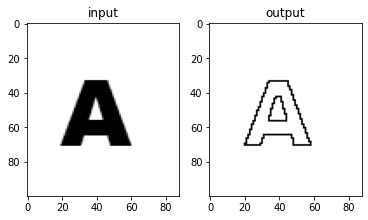

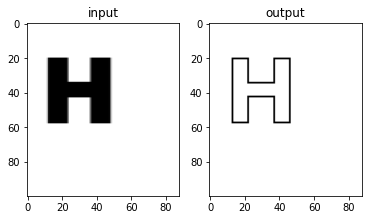

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

'''
get_morphological_edges
img: image array
'''
def get_morphological_edges(img):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("input")
    # make the image array a binary (0 background, 1 border)
    result = ""
    lines = len(img)
    columns = len(img[0])
    for line in range(lines):
        for column in range(columns):
            if img[line, column] > 0:
                img[line, column] = 0
            else:
                img[line, column] = 1
                
                
    # applying structuring element
    # bounds of the loops
    line_start = 1
    line_end = lines - 1
    column_start = 1
    column_end = columns - 1
    # step 1 
    list_filling = []
    
    for line in range(line_start, line_end):
        for column in range(column_start, column_end):
            if img[line, column] == 1:
                if (img[line-1, column-1] == 1 
                    and img[line-1, column] == 1
                    and img[line-1, column+1] == 1
                    and img[line, column-1] == 1
                    and img[line, column+1] == 1
                    and img[line+1, column-1] == 1
                    and img[line+1, column] == 1
                    and img[line+1, column+1] == 1):
                    list_filling.append((line, column))
                
    
    # applying internal gradient
    for filling in list_filling:
        img[filling[0], filling[1]]=0
    
   
    ax[1].imshow(img, cmap="binary")
    ax[1].set_title("output")
    
    plt.show()
    

imga = cv2.imread("exerc3a.bmp", 0)
get_morphological_edges(imga)


imgb = cv2.imread("exerc3b.bmp", 0)
get_morphological_edges(imgb)


2 - Faça um programa que construa o arranjo acumulador para detectar segmentos de retas em uma imagem bidimensional. Em seguida, use este programa com as imagens da aula 8 para identificar se uma linha presente em uma imagem é vertical, horizontal ou inclinada. Além do programa, você deve entregar pelo menos um exemplo de processamento com cada tipo de reta, mostrando a imagem original e a resposta do programa.

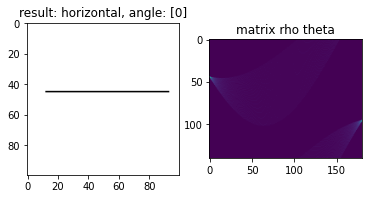

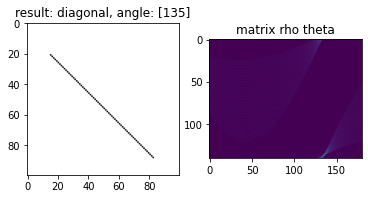

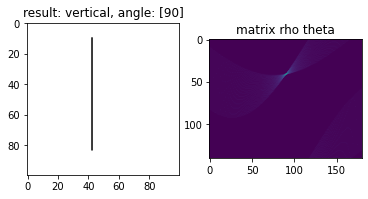

In [2]:
'''
get hough lines
img: image array
'''

def get_hough(img):
    fig, ax = plt.subplots(1, 2)
    lines = len(img)
    columns = len(img[0])
    # create the rho tetha matrix
    # and filling with zeroes
    max_theta = 180
    max_rho = round(math.sqrt((lines ** 2 + columns ** 2)))
    matrix_rho_theta = np.zeros((max_rho, max_theta))

    # looking for black
    for line in range(lines):
        for column in range(columns):
            if img[line, column] == 0:
                ## filling the acumulator
                for i in range(max_theta):
                    theta = i * math.pi / max_theta
                    rho = round(line * math.cos(theta) + column * math.sin(theta))
                    matrix_rho_theta[rho, i] = matrix_rho_theta[rho, i] + 1

    
    
    # getting the angle by the max k counts in a theta column
    line_angle = np.where(matrix_rho_theta == np.amax(matrix_rho_theta))[1]
    if line_angle == 0 or line_angle ==180:
        result = "horizontal"
        
    if line_angle == 45 or line_angle == 135:
        result = "diagonal"
        
    if line_angle == 90:
        result = "vertical"
    
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("result: " + result + ", angle: " + str(line_angle))

    ax[1].imshow(matrix_rho_theta)
    ax[1].set_title("matrix rho theta")


horizontal = cv2.imread("horizontal.bmp", 0)
get_hough(horizontal)

inclinada = cv2.imread("inclinada.bmp", 0)
get_hough(inclinada)

vertical = cv2.imread("vertical.bmp", 0)
get_hough(vertical)